# Домашнее задание к лекции «Задачи классификации и кластеризации»

Текст задания также доступен тут http://prntscr.com/umci7o

Задание.

    Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
    Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
    Разделите данные на выборку для обучения и тестирования
    Постройте модель LDA
    Визуализируйте предсказания для тестовой выборки и центры классов
    Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
    Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию



In [1]:
# Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris


In [2]:
iris_data = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
iris_data = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)

# Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
iris_data = iris_data[['sepal length (cm)', 'sepal width (cm)']]
iris_data.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width'}, inplace=True)
variety = load_iris().target
iris_data


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [4]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# Разделите данные на выборку для обучения и тестирования

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal_length','sepal_width']], variety, test_size=0.20, random_state=42)


In [6]:
# Постройте модель LDA

# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, y_pred]).T
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,2
9,1,1


In [7]:
# Визуализируйте предсказания для тестовой выборки и центры классов

In [8]:
import matplotlib.pyplot as plt
from matplotlib import colors

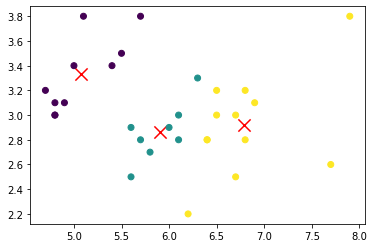

In [9]:
lda_small_for_test = LinearDiscriminantAnalysis()
lda_small_for_test.fit(X_test, y_pred)
# посмотрим на наши центроиды
lda_small_for_test.means_
# центроиды
plt.scatter(lda_small_for_test.means_[:, 0], lda_small_for_test.means_[:, 1], c='r', s=150, marker='x')

plt.scatter(x=X_test['sepal_length'], y=X_test['sepal_width'], c=y_pred)
plt.show()

In [10]:
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [11]:
iris_data['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [12]:
iris_data['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [13]:
sepal_length = np.array(iris_data['sepal_length'])
sepal_width = np.array(iris_data['sepal_width'])

X = np.array([iris_data['sepal_length'], iris_data['sepal_width']]).T
X


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [14]:
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [15]:
print(sepal_length.max())
print(sepal_length.min())
print(sepal_width.max())
print(sepal_width.min())

7.9
4.3
4.4
2.0


In [16]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

In [18]:
print(sepal_length.max())
print(sepal_length.min())
print(sepal_width.max())
print(sepal_width.min())

7.9
4.3
4.4
2.0


In [19]:
print(sepal_length_scaled.max())
print(sepal_length_scaled.min())
print(sepal_width_scaled.max())
print(sepal_width_scaled.min())

NameError: name 'sepal_length_scaled' is not defined

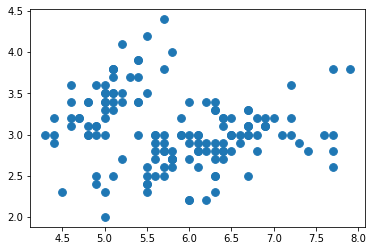

In [20]:
plt.scatter(sepal_length, sepal_width,cmap='autumn', s=60)

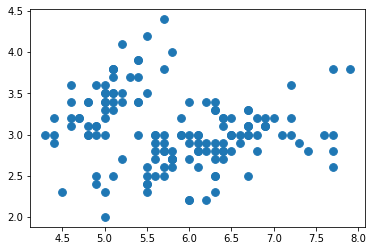

In [74]:
plt.scatter(X[:, 0], X[:, 1],cmap='autumn', s=60)

In [21]:
from sklearn.cluster import KMeans

In [22]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

NameError: name 'clusters' is not defined

In [23]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


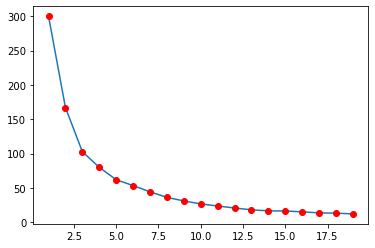

In [24]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [26]:
# явно указываем количество кластеров - из графика локтя после 3 растояние между точками меняется слабо
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [29]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

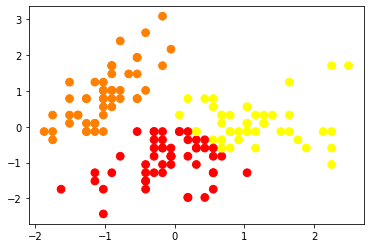

In [27]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

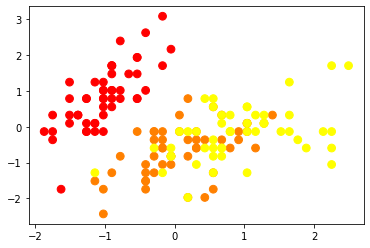

In [30]:
# построю график с кластеризацией из переменной variety
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=variety, s=60)

In [ ]:
# кажется разделение на классы произошло не совсем корректно
